In [ ]:
# Importing python libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# Ignoring unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing the csv file(dataset)
df = pd.read_csv('twitter.csv')

In [ ]:
# Rename columns for clarity
df.columns = ['id', 'entity', 'sentiment', 'text']

In [ ]:
df.head()

,id,entity,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
df.shape

(74681, 4)

In [ ]:
#check for null values
df.isnull().sum()

,0
id,0
entity,0
sentiment,0
text,686


In [ ]:
#drop null values
df.drop(['id'], axis=1, inplace=True)
df.dropna(inplace=True)

In [ ]:
#check for duplicate values
df.duplicated().sum()

3039

In [ ]:
#drop duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
df['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [ ]:
# Preprocess Text
def preprocess_text(text):
    # Remove punctuations, special symbols, and special characters
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

In [ ]:
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [ ]:
# Drop rows with empty text after preprocessing
df = df[df['cleaned_text'].str.strip() != '']

# Check for missing values in sentiment column
print("Null values in sentiment column:", df['sentiment'].isnull().sum())
print("Null values in text column:",df['text'].isnull().sum())

Null values in sentiment column: 0
Null values in text column: 0


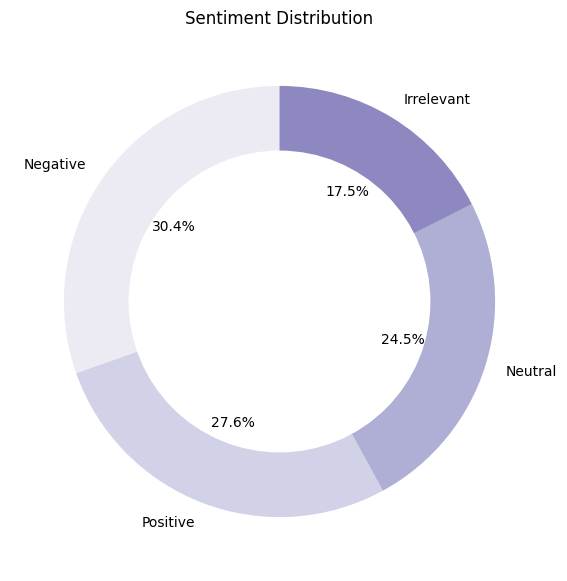

In [ ]:
# Visualize Sentiment Distribution
plt.figure(figsize=(7, 7))
sentiment_counts = df['sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=sns.color_palette('Purples'), autopct='%1.1f%%', startangle=90)
center_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(center_circle)
plt.title('Sentiment Distribution')
plt.show()

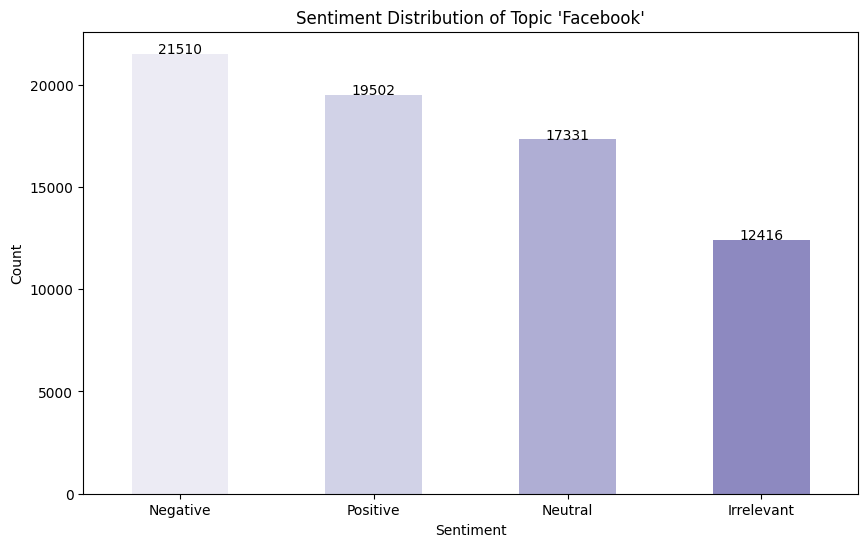

In [ ]:
# Visualize Sentiment Distribution for the Topic "Facebook"
plt.figure(figsize=(10, 6))
bars = sentiment_counts.plot(kind='bar', color=sns.color_palette('Purples'))
# Annotating the bars with count values
for index, value in enumerate(sentiment_counts):
    plt.text(index, value + 0.5, str(value), ha='center')
plt.title("Sentiment Distribution of Topic 'Facebook'")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

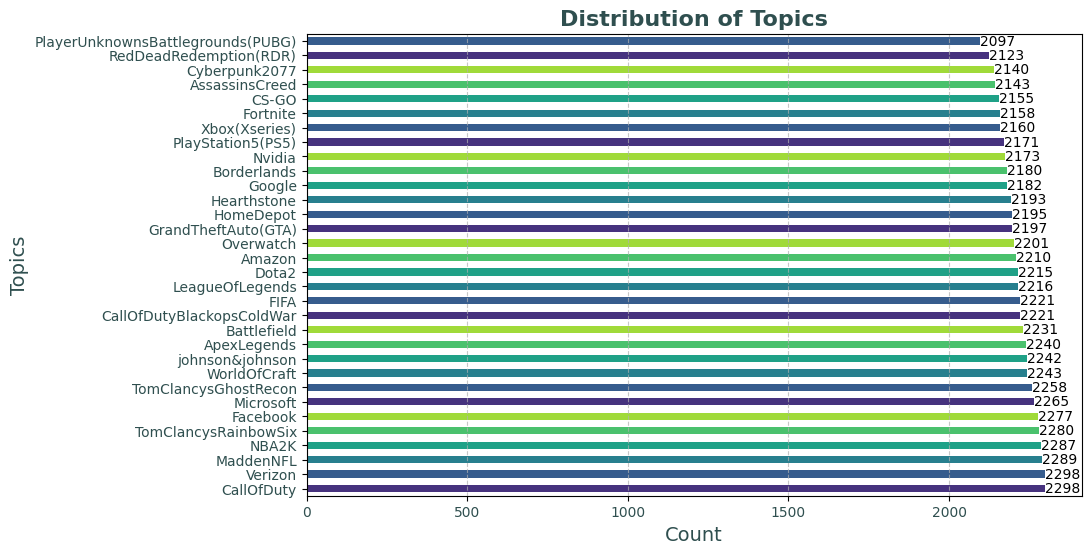

In [ ]:
# Visualizing Count of Distribution of Topics
plt.figure(figsize=(10,6))
df['entity'].value_counts().plot(kind='barh', color=sns.color_palette('viridis'))
for index, value in enumerate(df['entity'].value_counts()):
    plt.text(value, index, str(value), va='center')

plt.title("Distribution of Topics", fontsize=16, fontweight='bold', color='darkslategray')
plt.xlabel("Count", fontsize=14, color='darkslategray')
plt.ylabel("Topics", fontsize=14, color='darkslategray')
plt.xticks(color='darkslategray')
plt.yticks(color='darkslategray')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

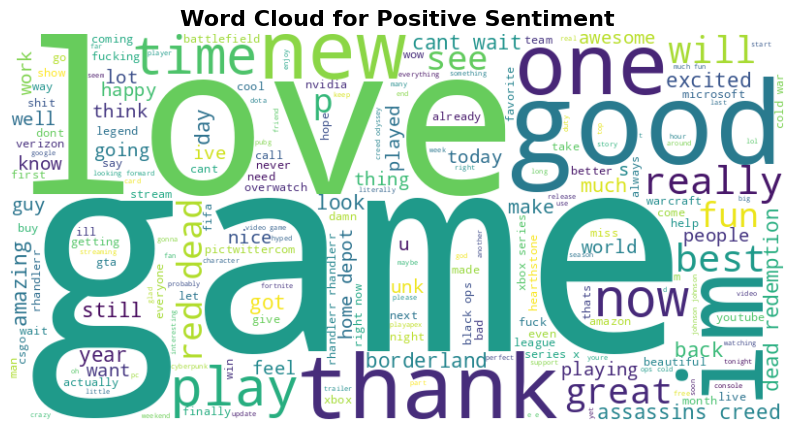

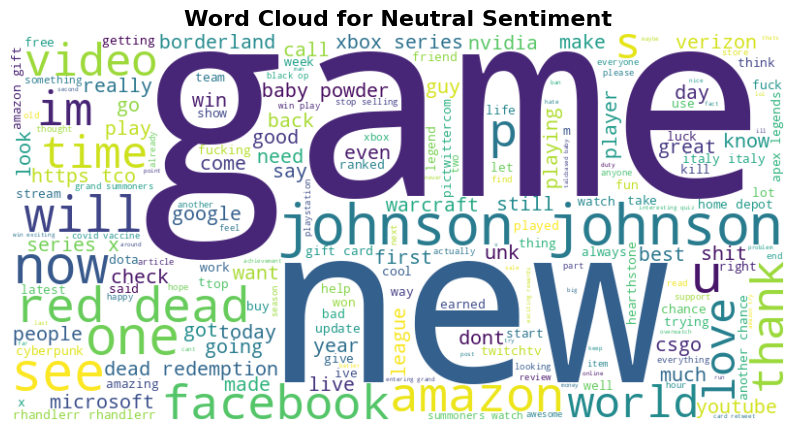

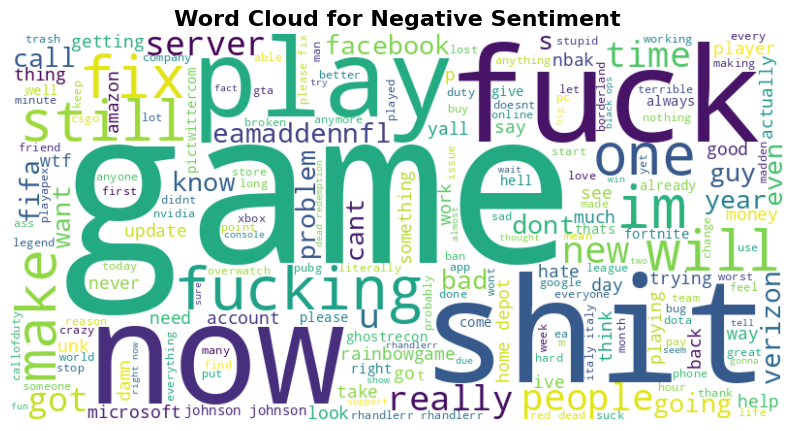

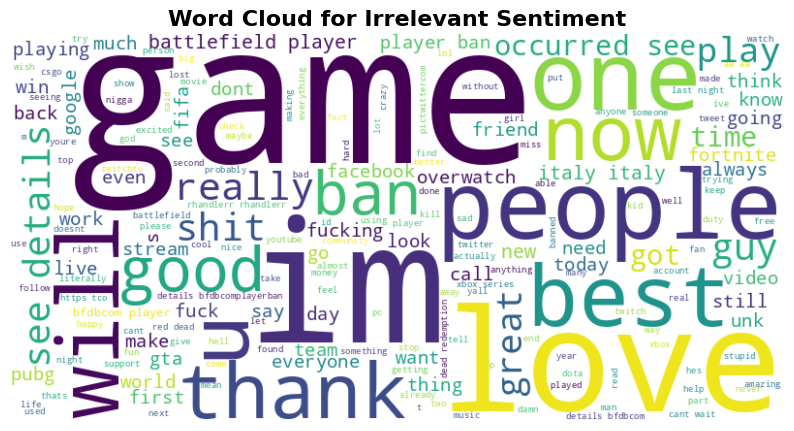

In [ ]:
# Word Cloud for Each Sentiment
sentiments = df['sentiment'].unique()

for sentiment in sentiments:
    text = ' '.join(df[df['sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', contour_color='steelblue', contour_width=1.5).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment', fontsize=16, weight='bold')
    plt.show()

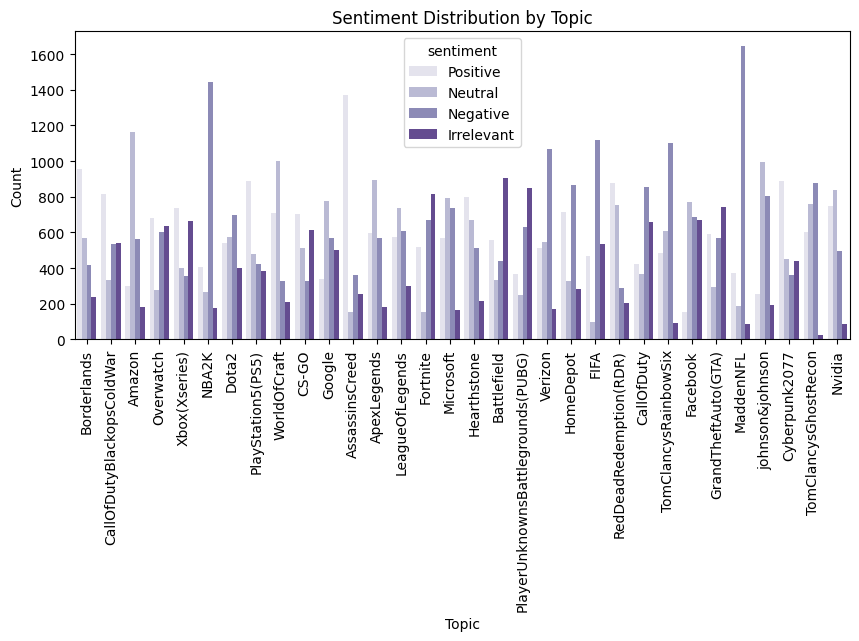

In [ ]:
# Visualizing Topics
if 'entity' in df.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x='entity', hue='sentiment', palette='Purples')
    plt.title('Sentiment Distribution by Topic')
    plt.xlabel('Topic')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

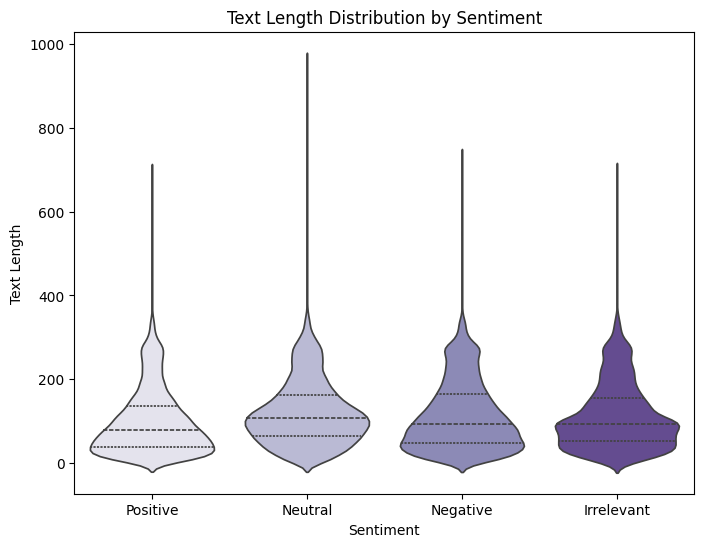

In [ ]:
# Visualizing Sentiment Analysis by Length of Text
df['text_length'] = df['text'].str.len()
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='sentiment', y='text_length', palette='Purples', inner='quartile')
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()

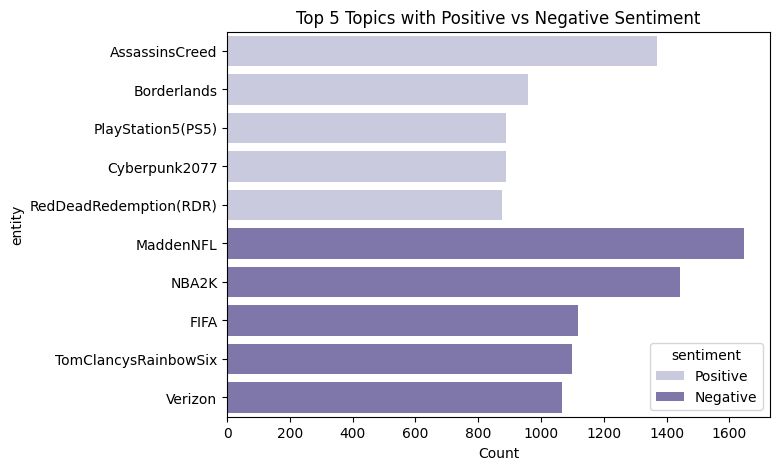

In [ ]:
# Visualizing Top 5 Topics for Positive and Negative sentiment
top_5_positive = df[df['sentiment'] == 'Positive']['entity'].value_counts().head(5)
top_5_negative = df[df['sentiment'] == 'Negative']['entity'].value_counts().head(5)
# Combine into a single DataFrame
combined_df = pd.DataFrame({
    'entity': top_5_positive.index.tolist() + top_5_negative.index.tolist(),
    'count': top_5_positive.values.tolist() + top_5_negative.values.tolist(),
    'sentiment': ['Positive'] * len(top_5_positive) + ['Negative'] * len(top_5_negative)
})
plt.figure(figsize=(7, 5))
sns.barplot(data=combined_df, x='count', y='entity', hue='sentiment', palette='Purples')
plt.xlabel('Count')
plt.title('Top 5 Topics with Positive vs Negative Sentiment')
plt.show()

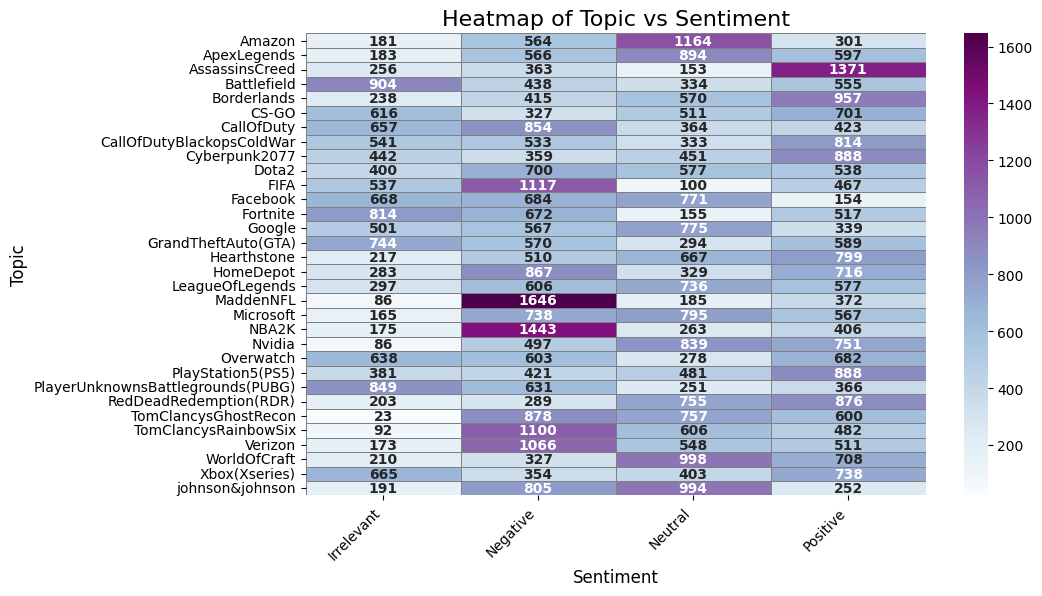

In [ ]:
#Visualizing Topic vs. Sentiment with a Heatmap
crosstab = pd.crosstab(index=df['entity'], columns=df['sentiment'])
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, cmap='BuPu', annot=True, fmt='d', linewidths=.7, linecolor='gray', annot_kws={"size": 10, "weight": 'bold'})
plt.title('Heatmap of Topic vs Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Topic', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()